In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv('uber_event.csv')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DateTime             48120 non-null  object 
 1   Junction             48120 non-null  int64  
 2   Vehicles             48120 non-null  int64  
 3   Vehicles_normalized  48120 non-null  float64
 4   latitude             48120 non-null  float64
 5   longitude            48120 non-null  float64
 6   temperature          48120 non-null  int64  
 7   weather_description  48120 non-null  object 
 8   wind_speed           48120 non-null  float64
 9   humidity             48120 non-null  float64
 10  precipitation        48120 non-null  float64
 11  visibility           48120 non-null  float64
 12  pressure             48120 non-null  float64
 13  Events               48120 non-null  object 
 14  Name                 48120 non-null  object 
 15  City                 48120 non-null 

In [69]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d-%m-%Y %H:%M')

In [70]:
# Convert DateTime column to datetime format and extract hour
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Hour'] = df['DateTime'].dt.hour

In [71]:
# Define categorical features for encoding
categorical_features = ['weather_description', 'Events', 'Name', 'City', 'Country', 'Venue']

In [72]:
# Define preprocessing pipeline for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

In [73]:
X = df.drop(['DateTime','Vehicles',], axis=1)
y = df['Vehicles']

In [74]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Define Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

In [76]:
# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [77]:
# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

In [78]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.01244599958437243


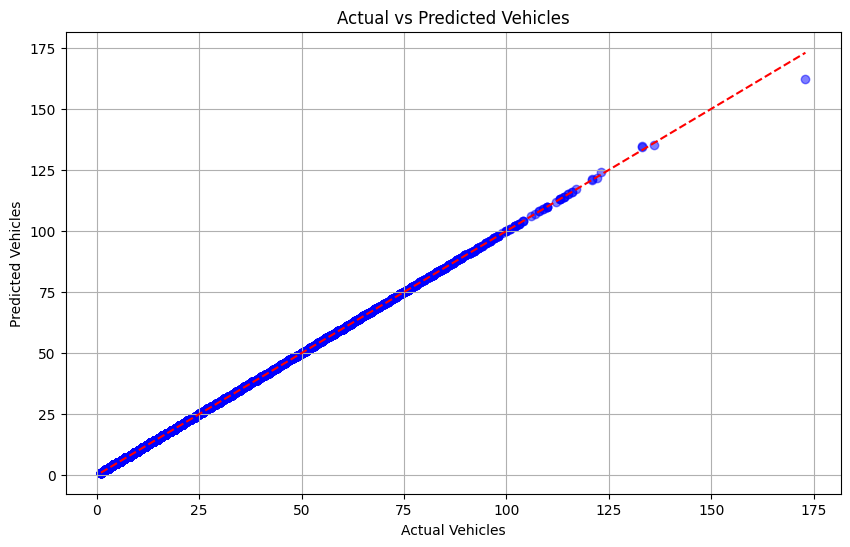

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Actual vs Predicted Vehicles')
plt.xlabel('Actual Vehicles')
plt.ylabel('Predicted Vehicles')
plt.grid(True)
plt.show()

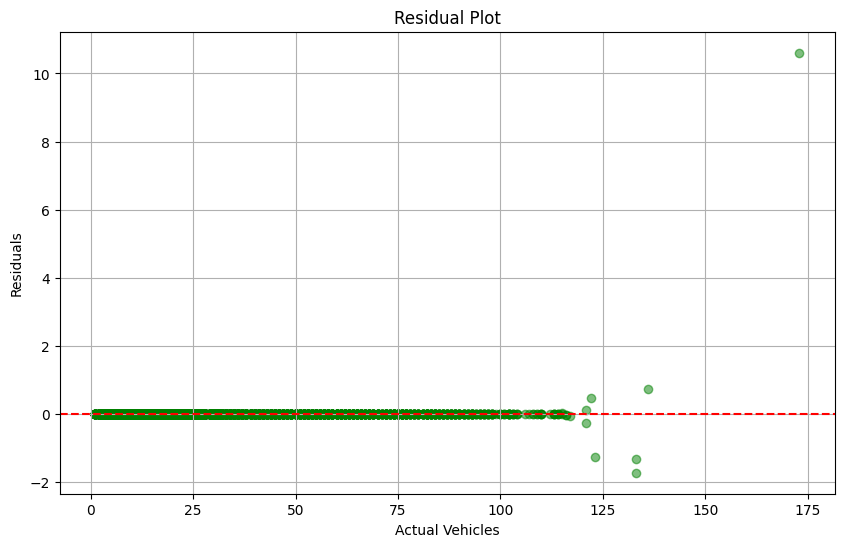

In [80]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='green', alpha=0.5)
plt.axhline(y=0, linestyle='--', color='red')
plt.title('Residual Plot')
plt.xlabel('Actual Vehicles')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()